### 1. Knihovny a moduly pro matematické výpočty

In [32]:
import numpy as np
import scipy.integrate as spi
import time
from numpy.linalg import solve

def skalarni_soucin_py(a, b):        # 1. úloha - skalární součin dvou vektorů
    return sum([a[i] * b[i] for i in range(len(a))])

def nasobeni_matic_py(A, B):     # 2. úloha - násobení dvou matic
    return [[sum(a * b for a, b in zip(A_row, B_col)) for B_col in zip(*B)] for A_row in A]

def scitani_vektoru_py(a, b):       # 3. úloha - sčítání dvou vektorů
    return [x + y for x, y in zip(a, b)]

def numericka_integrace_py(f, a, b, n):        # 4. úloha - numerická integrace (pravidlo lichoběžníků)
    h = (b - a) / n
    vysledek = (f(a) + f(b)) / 2.0
    vysledek += sum(f(a + i * h) for i in range(1, n))
    return vysledek * h

def reseni_soustavy_rovnic_py(a, b):       # 5. úloha - řešení soustavy lineárních rovnic
    # gaussova eliminace
    n = len(b)
    for i in range(n):
        pivot = max(range(i, n), key=lambda r: abs(a[r][i]))
        a[i], a[pivot] = a[pivot], a[i]
        b[i], b[pivot] = b[pivot], b[i]
        
        for j in range(i+1, n):
            pomer = a[j][i] / a[i][i]
            for k in range(i, n):
                a[j][k] -= pomer* a[i][k]
            b[j] -= pomer * b[i]
    
    # zpětná substituce
    x = [0] * n
    for i in range(n-1, -1, -1):
        x[i] = (b[i] - sum(a[i][j] * x[j] for j in range(i+1, n))) / a[i][i]
    return x


# testovací data
vektor_1 = np.random.rand(1000).tolist()
vektor_2 = np.random.rand(1000).tolist()
matice_a = np.random.rand(200, 200).tolist()
matice_b = np.random.rand(200, 200).tolist()
funkce = lambda x: x**2 + np.sin(x)
a_soustava = np.random.rand(100, 100).tolist()
b_soustava = np.random.rand(100).tolist()


# seznam matematických operací s funkcemi pro python a numpy + argumenty
operace = [
    ("Skalární součin", skalarni_soucin_py, (vektor_1, vektor_2), np.dot, (np.array(vektor_1), np.array(vektor_2))),
    ("Násobení matic", nasobeni_matic_py, (matice_a, matice_b), np.dot, (np.array(matice_a), np.array(matice_b))),
    ("Sčítání dvou vektorů", scitani_vektoru_py, (vektor_1, vektor_2), np.add, (np.array(vektor_1), np.array(vektor_2))),
    ("Numerická integrace", numericka_integrace_py, (funkce, 0, 1, 100000), spi.quad, (funkce, 0, 1)),
    ("Řešení soustavy rovnic", reseni_soustavy_rovnic_py, (a_soustava, b_soustava), solve, (np.array(a_soustava), np.array(b_soustava)))
]

# funkce pro měření doby výpočtu
def doba_vypoctu(funkce, *argumenty):
    start = time.perf_counter()
    funkce(*argumenty)
    return time.perf_counter() - start

# měření časů a výpis výsledků
for nazev_operace, funkce_py, argumenty_py, funkce_numpy, argumenty_numpy in operace:
    cas_py = doba_vypoctu(funkce_py, *argumenty_py)
    cas_numpy = doba_vypoctu(funkce_numpy, *argumenty_numpy)
    print(f"{nazev_operace} (standardní Python): {cas_py:.5f} s")
    print(f"{nazev_operace} (NumPy/SciPy): {cas_numpy:.5f} s\n")

Skalární součin (standardní Python): 0.00030 s
Skalární součin (NumPy/SciPy): 0.00004 s

Násobení matic (standardní Python): 0.82098 s
Násobení matic (NumPy/SciPy): 0.00109 s

Sčítání dvou vektorů (standardní Python): 0.00023 s
Sčítání dvou vektorů (NumPy/SciPy): 0.00003 s

Numerická integrace (standardní Python): 0.12854 s
Numerická integrace (NumPy/SciPy): 0.00011 s

Řešení soustavy rovnic (standardní Python): 0.03540 s
Řešení soustavy rovnic (NumPy/SciPy): 0.00034 s



### 2. Vizualizace dat

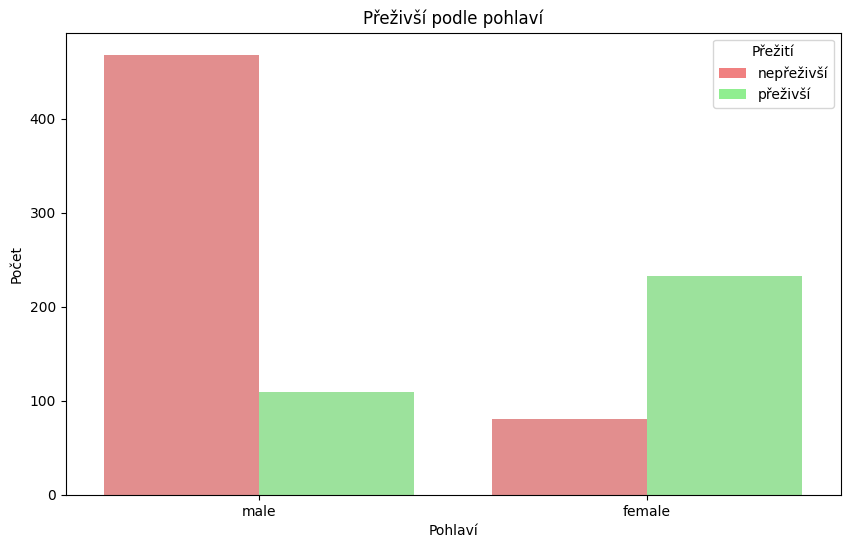

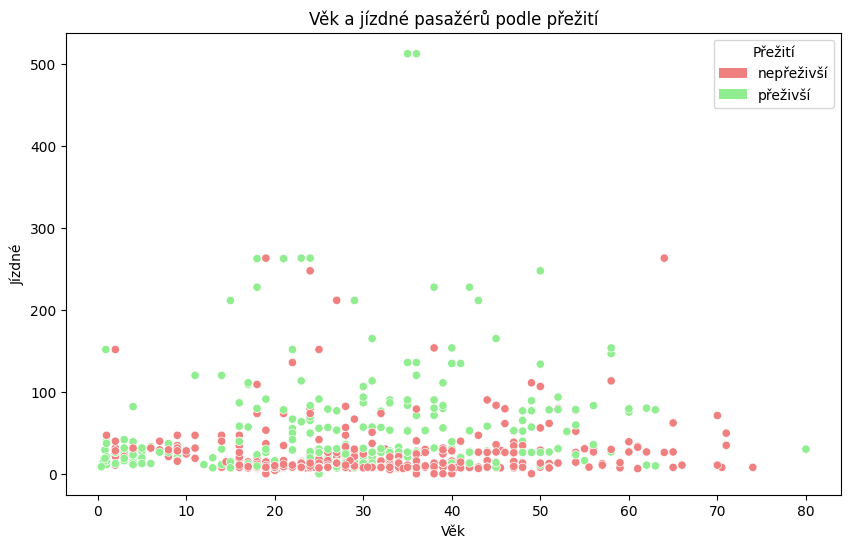

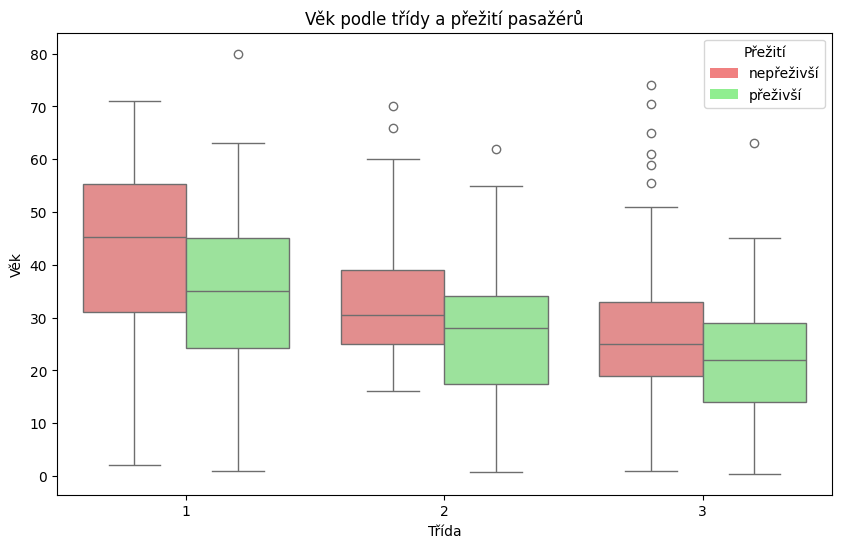

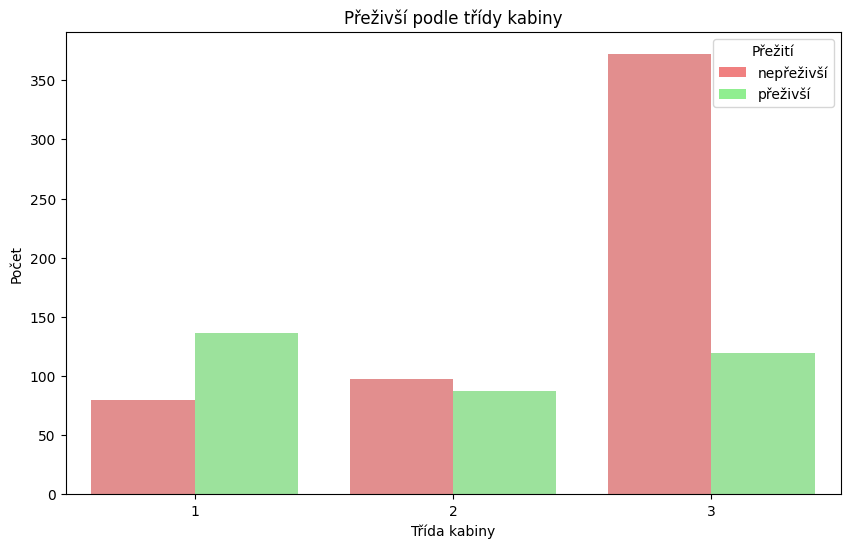

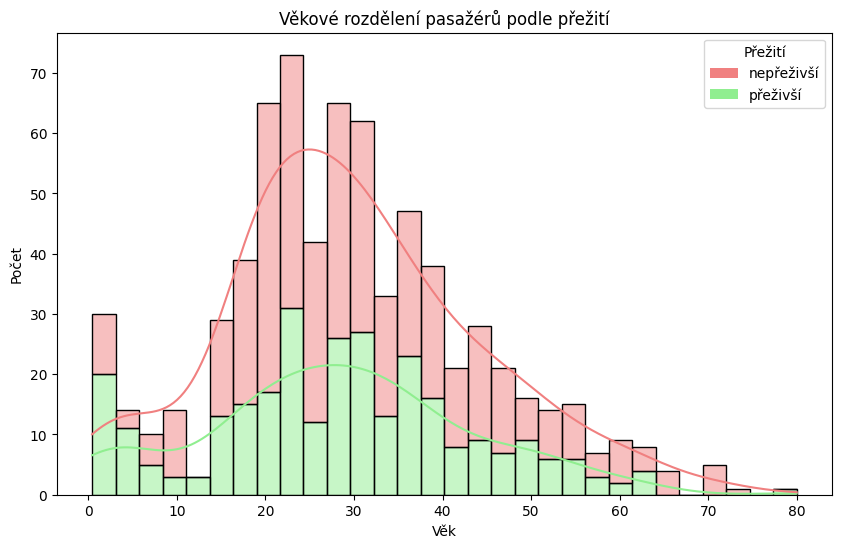

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch  # pro ruční vytvoření legendy

# načtení datové sady Titanic
# https://www.kaggle.com/datasets/yasserh/titanic-dataset
data = pd.read_csv("C:/Users/bhyps/Desktop/Titanic-Dataset.csv")

# konstanty pro grafy
PALETTE = {0: "lightcoral", 1: "lightgreen"}  # číselné klíče pro barvy (nepřeživší = červená, přeživší = modrá)
FIGSIZE = (10, 6)                             # velikost každého grafu (výška, šířka)


# funkce pro nastavení základních popisků grafu (název grafu a jeho os)
def set_plot_labels(nazev, osa_x, osa_y):
    plt.title(nazev)    
    plt.xlabel(osa_x)  
    plt.ylabel(osa_y)   

# funkce pro vykreslení grafu
def plot_graph(funkce, *argumenty, nazev, osa_x, osa_y, **volitelne):
    legend_elements = [Patch(facecolor="lightcoral", label="nepřeživší"),
                       Patch(facecolor="lightgreen", label="přeživší")]
    plt.figure(figsize=FIGSIZE)
    funkce(*argumenty, **volitelne)
    set_plot_labels(nazev, osa_x, osa_y)
    plt.legend(handles=legend_elements, title="Přežití", loc="upper right")
    plt.show()

# --- vykreslení všech grafů ---
# 1. přeživší podle pohlaví
plot_graph(sns.countplot, x="Sex", hue="Survived", data=data, palette=PALETTE, 
           nazev="Přeživší podle pohlaví", osa_x="Pohlaví", osa_y="Počet")

# 2. věk a jízdné podle přežití (správná barva legendy)
plot_graph(sns.scatterplot, x="Age", y="Fare", hue="Survived", data=data, palette=PALETTE, 
           nazev="Věk a jízdné pasažérů podle přežití", osa_x="Věk", osa_y="Jízdné")

# 3. věk podle třídy a přežití (správná barva legendy)
plot_graph(sns.boxplot, x="Pclass", y="Age", hue="Survived", data=data, palette=PALETTE, 
           nazev="Věk podle třídy a přežití pasažérů", osa_x="Třída", osa_y="Věk")

# 4. přežití podle třídy kabiny
plot_graph(sns.countplot, x="Pclass", hue="Survived", data=data, palette=PALETTE, 
           nazev="Přeživší podle třídy kabiny", osa_x="Třída kabiny", osa_y="Počet")

# 5. věkové rozdělení pasažérů podle přežití 
plot_graph(sns.histplot, x="Age", hue="Survived", data=data, multiple="stack", kde=True, palette=PALETTE, bins=30, 
    nazev="Věkové rozdělení pasažérů podle přežití", osa_x="Věk", osa_y="Počet")


### 3. Úvod do lineární algebry

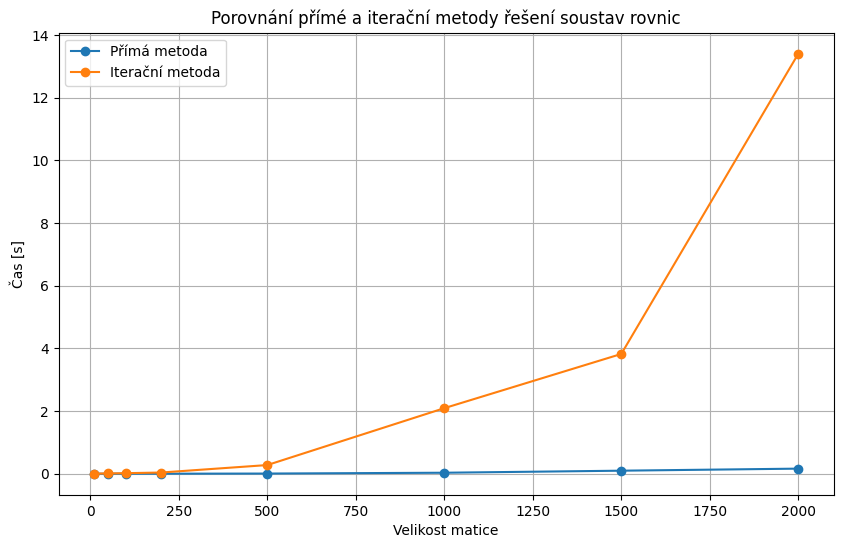

In [216]:
import numpy as np
import matplotlib.pyplot as plt
import time
from scipy.sparse.linalg import cg  # Conjugate Gradient metoda (iterační metoda)

def prima_metoda(A, B):     # funkce pro přímou metodu
    start = time.time()
    x = np.linalg.solve(A, B)
    return time.time() - start

def iteracni_metoda(A, B):      # funkce pro iterační metodu
    start = time.time()
    x, _ = cg(A, B)
    return time.time() - start

velikost_matic = [10, 50, 100, 200, 500, 1000, 1500, 2000]      # velikosti matic, které budeme testovat

prima_metoda_cas = []
iteracni_metoda_cas = []

# pro různé velikosti matice budeme měřit čas výpočtu
for velikost in velikost_matic:
    # generování náhodné soustavy rovnic
    A = np.random.rand(velikost, velikost)
    B = np.random.rand(velikost)

    prima_metoda_cas.append(prima_metoda(A, B))             # čas přímé metody
    iteracni_metoda_cas.append(iteracni_metoda(A, B))       # čas iterační metody

# vykreslení grafu
plt.figure(figsize=(10, 6))
plt.plot(velikost_matic, prima_metoda_cas, label="Přímá metoda", marker="o")
plt.plot(velikost_matic, iteracni_metoda_cas, label="Iterační metoda", marker="o")
plt.xlabel("Velikost matice")
plt.ylabel("Čas [s]")
plt.title("Porovnání přímé a iterační metody řešení soustav rovnic")
plt.legend()
plt.grid(True)
plt.show()


### 4. Interpolace a aproximace funkce jedné proměnné

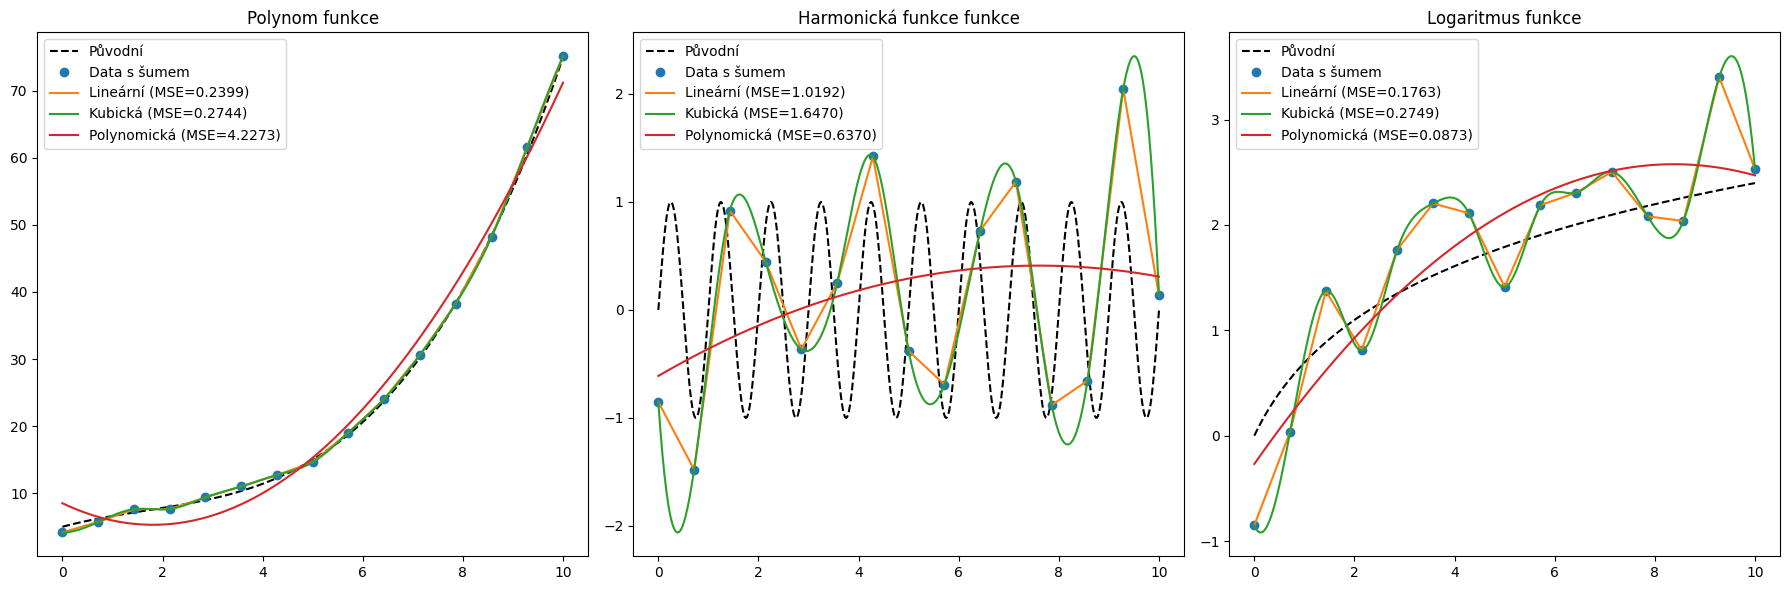

In [214]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d, CubicSpline
from sklearn.metrics import mean_squared_error

# definujeme tři základní funkce
def polynom(x):
    return 0.1 * x**3 - 0.5 * x**2 + 2 * x + 5

def harmonicka_funkce(x):
    return np.sin(2 * np.pi * x)

def logaritmus(x):
    return np.log(x + 1)

x_diskretni = np.linspace(0, 10, 15)          # diskrétní body
x_jemnejsi = np.linspace(0, 10, 500)          # jemnější body, rozdělení na více bodů

sum = np.random.normal(0, 0.5, x_diskretni.shape)       # přidáme šum

# vytvoříme seznam funkcí a názvů pro jednodušší zpracování
seznam_funkci = [(polynom, "Polynom"), (harmonicka_funkce, "Harmonická funkce"), (logaritmus, "Logaritmus")]
vysledky = {}

# smyčka přes funkce a interpolace
for funkce, nazev in seznam_funkci:
    y_sum = funkce(x_diskretni) + sum  # přidání šumu
    y_skutecne = funkce(x_jemnejsi)  # skutečná funkce

    # interpolace
    linearni_interpolace = interp1d(x_diskretni, y_sum, kind='linear')(x_jemnejsi)
    kubicka_interpolace = CubicSpline(x_diskretni, y_sum)(x_jemnejsi)
    polynomicka_interpolace = np.poly1d(np.polyfit(x_diskretni, y_sum, 2))(x_jemnejsi)

    # výpočet MSE (Mean Squared Error - Střední kvadratická chyba)
    mse_linearni = mean_squared_error(y_skutecne, linearni_interpolace)
    mse_kubicka = mean_squared_error(y_skutecne, kubicka_interpolace)
    mse_polynomicka = mean_squared_error(y_skutecne, polynomicka_interpolace)

    # uložíme výsledky pro pozdější vykreslení
    vysledky[nazev] = {
        "x_jemnejsi": x_jemnejsi,
        "y_skutecne": y_skutecne,
        "y_sum": y_sum,
        "linearni": (linearni_interpolace, mse_linearni),
        "kubicka": (kubicka_interpolace, mse_kubicka),
        "polynomicka": (polynomicka_interpolace, mse_polynomicka)
    }

# vykreslíme všechny funkce v jednom grafu
plt.figure(figsize=(18, 6))

for i, (nazev, vysledek) in enumerate(vysledky.items(), 1):
    plt.subplot(1, 3, i)
    plt.plot(vysledek["x_jemnejsi"], vysledek["y_skutecne"], label="Původní", color="black", linestyle="--")
    plt.plot(x_diskretni, vysledek["y_sum"], "o", label="Data s šumem")
    plt.plot(vysledek["x_jemnejsi"], vysledek["linearni"][0], label=f"Lineární (MSE={vysledek['linearni'][1]:.4f})")
    plt.plot(vysledek["x_jemnejsi"], vysledek["kubicka"][0], label=f"Kubická (MSE={vysledek['kubicka'][1]:.4f})")
    plt.plot(vysledek["x_jemnejsi"], vysledek["polynomicka"][0], label=f"Polynomická (MSE={vysledek['polynomicka'][1]:.4f})")
    plt.title(f"{nazev} funkce")
    plt.legend()

plt.tight_layout()
plt.show()


### 5. Hledání kořenů rovnice

In [212]:
import numpy as np
from scipy.optimize import bisect, newton
import time

# definice funkcí
def polynomialni(x):
    return x**3 - 6*x**2 + 11*x - 6      # kořeny: x = 1, 2, 3

def logaritmicka(x):
    return np.log(x + 1) - 1     # kořen: x ≈ 1.71828

def harmonicka(x):
    return np.sin(x)     # kořeny: x = n*pi pro n celé číslo

# funkce pro nalezení kořenů a měření času
def koreny_puleni(funkce, a, b):
    start = time.perf_counter()
    koren = bisect(funkce, a, b)
    return koren, time.perf_counter() - start

def koreny_newton(funkce, x0):
    start = time.perf_counter()
    koren = newton(funkce, x0)
    return koren, time.perf_counter() - start

seznam_funkci = [
    ("Polynomiální", polynomialni, (0, 3), 1.5),
    ("Logaritmická", logaritmicka, (0, 3), 1.5),
    ("Harmonická", harmonicka, (3, 4), 3)
]

for nazev, funkce, (a, b), x0 in seznam_funkci:
    print(f"\n{nazev} funkce:")
    
    # metoda půlení intervalu (ohraničená)
    koren_puleni, cas_puleni = koreny_puleni(funkce, a, b)
    print(f"  Půlení intervalu: kořen = {koren_puleni:.5f}, čas = {cas_puleni:.5f} s")
    
    # Newtonova metoda (neohraničená)
    koren_newton, cas_newton = koreny_newton(funkce, x0)
    print(f"  Newtonova metoda: kořen = {koren_newton:.5f}, čas = {cas_newton:.5f} s")



Polynomiální funkce:
  Půlení intervalu: kořen = 3.00000, čas = 0.00006 s
  Newtonova metoda: kořen = 3.00000, čas = 0.00024 s

Logaritmická funkce:
  Půlení intervalu: kořen = 1.71828, čas = 0.00015 s
  Newtonova metoda: kořen = 1.71828, čas = 0.00012 s

Harmonická funkce:
  Půlení intervalu: kořen = 3.14159, čas = 0.00014 s
  Newtonova metoda: kořen = 3.14159, čas = 0.00011 s


### 7. Metoda Monte Carlo

In [281]:
import numpy as np

# funkce pro simulaci hodu kostkou a odhad pravděpodobnosti padnutí čísla 
def monte_carlo(pocet_hodu, cislo=3):
    hody = np.random.randint(1, 7, size=pocet_hodu)     # simulace hodů kostkou (náhodná čísla od 1 do 6)
    zasahy = np.sum(hody == cislo)                      # počet hodů, kde padlo číslo (např. 3)
    odhad_pravdepodobnosti = zasahy / pocet_hodu        # odhad pravděpodobnosti: poměr počtu "zásahů" k celkovému počtu hodů
    return odhad_pravdepodobnosti

pocet_hodu = 1000000        # počet hodů kostkou

odhad_pravdepodobnosti = monte_carlo(pocet_hodu, cislo=3)      # odhad pravděpodobnosti, že padne číslo 6
print(f"Odhad pravděpodobnosti, že padne číslo 3 při {pocet_hodu} hodech: {odhad_pravdepodobnosti:.5f}")

teoreticka_pravdepodobnost = 1 / 6     # teoretická pravděpodobnost (pro kontrolu)
print(f"Teoretická pravděpodobnost: {teoreticka_pravdepodobnost:.5f}")


Odhad pravděpodobnosti, že padne číslo 3 při 1000000 hodech: 0.16635
Teoretická pravděpodobnost: 0.16667
